In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pylab as plt
import seaborn as sns

/Users/kazuki.funahashi/miniconda3/envs/bitools_py3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/Users/kazuki.funahashi/miniconda3/envs/bitools_py3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("../co_quan_addsugar_zscrore.tsv", sep="\t", index_col=0)
gp = pd.read_excel('../compound_group.xlsx', index_col=0, engine='openpyxl').loc[df.columns]

In [4]:
df

,Formic acid,Acetic acid,Propionic acid,Isobutyric acid,Butyric acid,Isovaleric acid,Valeric acid,Deoxycholic acid,Hyodeoxycholic acid,beta-Muricholic acid,...,5-Amino-n-valeric acid,3-Indoleacetic acid,Hydroxypropionic acid,5-Hydroxy-3-indoleacetate,Taurine,Arabinose,Sucrose,Maltose&Trehalose,Mannose&talose&galactose&glucose,Fructose&Sorbose
17_AIN_32-2,-1.147049,-0.216068,-0.092537,0.351859,-0.366168,0.757189,0.484908,-0.082484,0.760463,-0.778923,...,-0.776524,-0.288675,0.968825,3.175426,1.186545,-0.579543,1.124075,1.809121,-0.081442,0.291454
18_AIN_33-3,-0.691820,-0.837773,-0.889492,-1.104230,-0.609918,-1.090356,-1.115555,1.154612,0.893469,-0.277375,...,-0.895637,-0.288675,-0.769170,-0.288675,-0.353172,-0.579543,1.094157,0.526356,-0.770566,-0.425993
19_AIN_34-4,0.457106,-0.339135,-0.396238,-0.530219,-0.613464,-0.275839,0.242630,0.340384,1.946798,0.534451,...,0.124342,-0.288675,-0.769170,-0.288675,0.341078,-0.579543,1.010142,0.112247,1.933915,0.033452
20_AIN_35-5,1.323844,-0.466377,-0.882329,-1.155940,-0.675450,-1.088127,-0.819922,-0.690023,0.491760,-0.986680,...,-0.810288,-0.288675,0.218601,-0.288675,-0.271059,-0.579543,1.582888,1.897432,0.072382,0.580368
21_HF_32-2,0.376737,-0.903667,-0.915852,-0.415733,-0.871018,-0.344152,-0.888246,-0.468435,-0.893125,-0.388502,...,-0.870197,-0.288675,-0.769170,-0.288675,-1.186199,-0.579543,-0.699944,-0.919251,-1.324492,-1.449673
22_HF_33-3,1.242482,-0.153626,-0.215267,1.911199,-0.227410,2.181984,2.312362,0.059128,-0.893125,2.067693,...,1.181508,-0.288675,-0.769170,-0.288675,-1.011285,-0.579543,0.227936,-0.659069,-0.203525,-0.521372
23_HF_34-4,-1.068509,-0.688550,-0.726804,0.106159,-0.724399,0.058660,-0.454817,-0.314940,-0.893125,-0.015554,...,-1.042850,-0.288675,-0.769170,-0.288675,-1.186199,-0.579543,-0.972624,-1.019321,-1.056109,-1.156197
24_HF_35-5,-1.127832,-0.660609,-0.557702,0.341345,-0.705222,0.533131,-0.394005,0.103016,0.589459,1.712813,...,0.789932,-0.288675,-0.769170,-0.288675,-1.186199,-0.579543,-1.644246,-1.161710,-0.973321,-1.308255
25_CE2_32-2,-1.060280,0.454908,0.445185,-0.939331,1.963486,-1.192011,1.077676,-1.348196,-0.893125,-1.037822,...,-0.482031,-0.288675,1.372062,-0.288675,0.243972,0.312955,-0.309901,0.039840,0.960037,1.700025
26_CE2_33-3,0.198215,-0.017621,0.679284,-0.451999,0.033428,-0.745326,-0.927332,2.157020,0.676802,0.153781,...,-0.010633,-0.288675,1.402323,-0.288675,0.974118,0.314912,-0.356059,-0.145861,-0.306339,0.249846


In [11]:
gp.loc[:, "color"] = 0

In [67]:
gp.loc[gp[gp["group"] == "SCFA"].index, "color"] = "#A8503D"
gp.loc[gp[gp["group"] == "BA"].index, "color"] = "#0C5445"
gp.loc[gp[gp["group"] == "Aminoacids"].index, "color"] = "#132FBA"
gp.loc[gp[gp["group"] == "Sugar"].index, "color"] = "#fea5c6"
gp.loc[gp[gp["group"] == "Other"].index, "color"] = "#F7EAC3"

In [56]:
gp

,group,color
Formic acid,SCFA,#E55945
Acetic acid,SCFA,#E55945
Propionic acid,SCFA,#E55945
Isobutyric acid,SCFA,#E55945
Butyric acid,SCFA,#E55945
Isovaleric acid,SCFA,#E55945
Valeric acid,SCFA,#E55945
Deoxycholic acid,BA,#0C5445
Hyodeoxycholic acid,BA,#0C5445
beta-Muricholic acid,BA,#0C5445


In [68]:
plt.rcParams["font.family"] = "Arial"

In [69]:
df_row_color = pd.Series(gp.loc[:, "color"])
df_row_color.index = df.columns

In [70]:
df_col_color = pd.Series(
    [
        "#479b3f", 
        "#479b3f", 
        "#479b3f", 
        "#479b3f", 
        "#4472c4",
        "#4472c4",
        "#4472c4",
        "#4472c4",
        "#db6a51",
        "#db6a51",
        "#db6a51",
        "#db6a51",
    ]
)
df_col_color.index = df.index

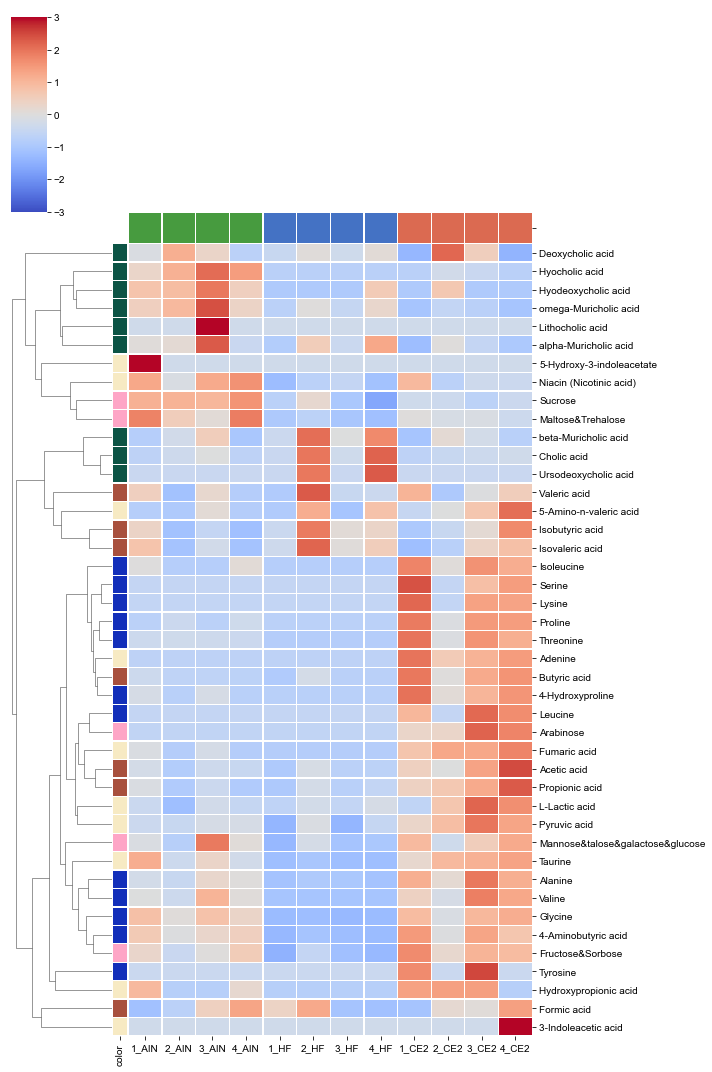

In [74]:
clustermap = sns.clustermap(
    df.T.dropna(),
    cmap="coolwarm",
    vmin=-3,
    vmax=3,
    linewidths=.2,
    col_cluster=False,
    row_colors = df_row_color,
    col_colors = df_col_color,
    figsize=(10,15)
)

In [79]:
# sfig = clustermap.get_figure()
clustermap.savefig("clustermap.pdf", orientation="landscape")